__Hydrograph Development Notebooks__ 


__Breach Hydrographs, Deposit, NY__


PYTHON
  
  
Overview: This notebook was created to document the development of breach hydrographs using historical flow data for two locations along the levee at [Deposit, NY](https://www.google.com/maps/place/Deposit,+NY+13754/@42.0669205,-75.4170064,403m/data=!3m1!1e3!4m5!3m4!1s0x89db121636b095eb:0x8831b5a6c812e9f7!8m2!3d42.0600834!4d-75.4276769). 

Updated 1.10.2017

In [1]:
import os
from glob import glob

from importlib import reload
import utils; reload(utils)
from utils import *

import pandas as pd
import numpy as np
from scipy import interpolate 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###  Read in Base Hydrograph
    1. Read in Base Hydrograph from TR-20 Hydrologic model (Unsteady HEC-RAS file)

Big_Hollow
Butler_Brook


Big_Hollow      2372.5
Butler_Brook    2260.0
dtype: float32

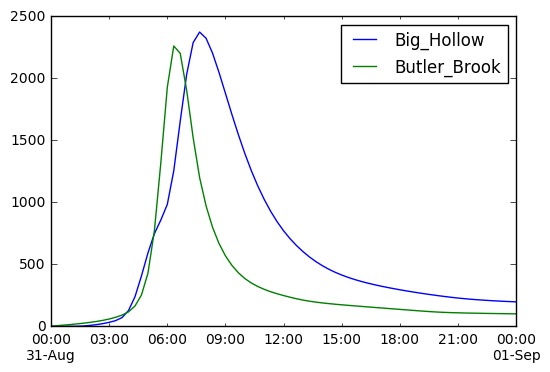

In [2]:
hdf_plan_file = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p06.hdf'
df = GetRasUnsteadyFlow(hdf_plan_file)
df.plot()
df.max()

# Develop a discharge hydrograph of the 1% storm for the main flooding source

## Exploratory Analysis
[Notebook](FirstLook_GageData.ipynb) developed to evaluate available gage data in the vicinity, plot available time series & qualitatively assess differences in hydrograph shapes.

## Discharge Hydrograph
In house, detailed hydrologic models created using the TR-20 model exist for both flooding sources. 1% Discharge hydrographs copied from model output.
     
## Develop of a breach hydrograph using the flow hydrograph created in step 1.

In order to convert the flow hydrograph to a stage hydrograph at any given location, a hydraulic analysis is necessary to properly account for differences in the cross-sectional area at different locations along the reach. For this study a 1D, Steady State model was used to simulate a Natural Valley scenario in the levee impact area. 

The geometry from this model was used to compute flows ranging from 1oo cfs to 2,500 cfs in increments of 100 cfs. The results of these simulations were used to develop a rating curve at each area of interest to translate flow to stage. The image below is an example of the results at a cross section, illustrating how geometric differences at different flow levels may impact the resultant stage for a given reach. 

Note that the change in water surface elevation when the flow is constrained by the channel and the levee during overbank flow rises at a greater rate when compared with the unconstrained flow when conveyance occurs on both sides of the levee (natural valley).

<img src="Example.png" , width=1000,height=600/>
![](Example.png)

### Procedure to create Breach Hydrograph

    A. Read in HEC-RAS data for the XS of interest & create a stage/discharge rating curve using computed flows.
    
    B. Using the data from the rating curve in Part A, create a function (nth degree polynomial interpolation equation) to convert flow to stage.

    C. Convert the 1% flow hydrograph created in Step 1 to a stage hydrograph using the rating curve function created in Part B.

    D. Normalize the stage to 'feet above the breach point' using the stage hydrograph created in Part C and the breach elevation (head = 0 at breach point).
    
    E. Using the head above breach hydrograph created in Part D, calculate weir flow for (use the Standard Weir Equation, below) each timestep & write to file.
    
    F. Input weir flow hydrograph created in Part E into HEC-RAS unsteady flow file. END.

#### The Standard Weir Equation: 
##  $\qquad$ $Q = CLH^{2/3}$ 

Where:  

$\qquad$ __Q__ = Discharge (cfs)
$\qquad$ __C__ = Weir coefficient (unitless) 
$\qquad$ __L__ = Weir crest length (ft)
$\qquad$ __H__ = Energy head over the weir crest (ft)


**From HEC-RAS Lateral Weir Coefficients, use the default Weir Coefficient of 2.0 (range is 1.5-2.6, given on page 3-50 of the [2D Users Manual](http://www.hec.usace.army.mil/software/hec-ras/documentation/HEC-RAS%205.0%202D%20Modeling%20Users%20Manual.pdf))*

### Breach Location # 1: Big Hollow (upstream) 


**RAS Data for XS 938**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Repos\HydrologyTools\sample_data\Deposit_BreachData_938_location_1.tsv


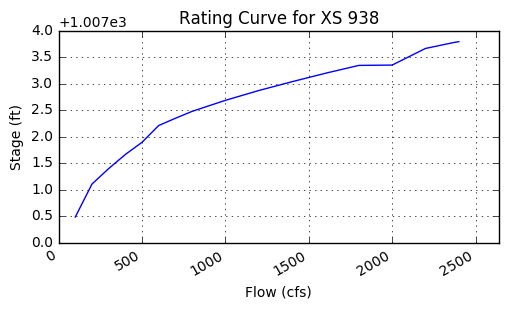

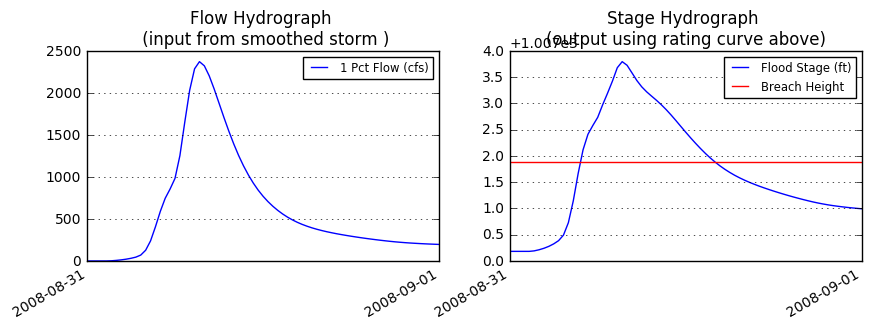

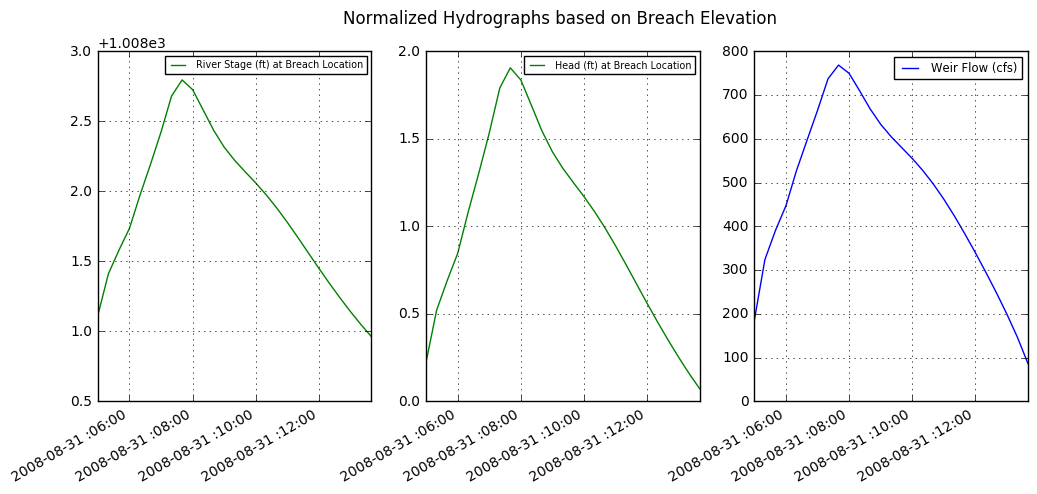

In [3]:
# Enter Ras Plan File
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\TOQC\Deposit\Deposit.p03.hdf' 

input_hydro = df['Big_Hollow']
station = str(938)
breach_point = 1
breach_height = 1008.89

data_dir = r'C:\Users\slawler\Repos\HydrologyTools\sample_data'
GetBreachFlow(input_hydro,'Deposit',  rasdata, station, breach_point, breach_height, data_dir, date_int = 2)

### Breach Location # 2: Big Hollow (downstream)


**RAS Data for XS 1**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Repos\HydrologyTools\sample_data\Deposit_BreachData_1_location_1.tsv


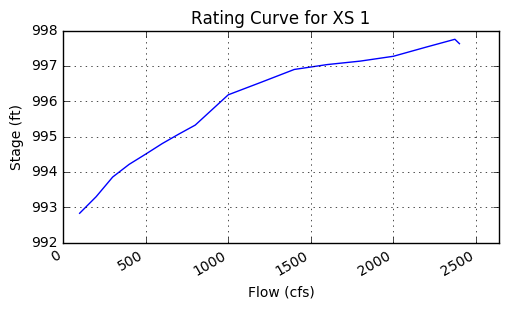

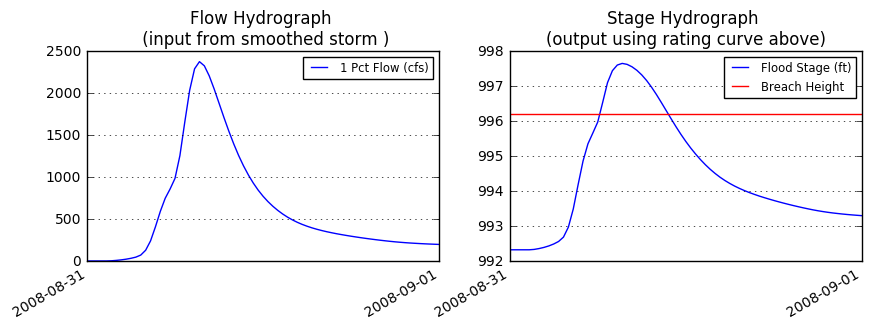

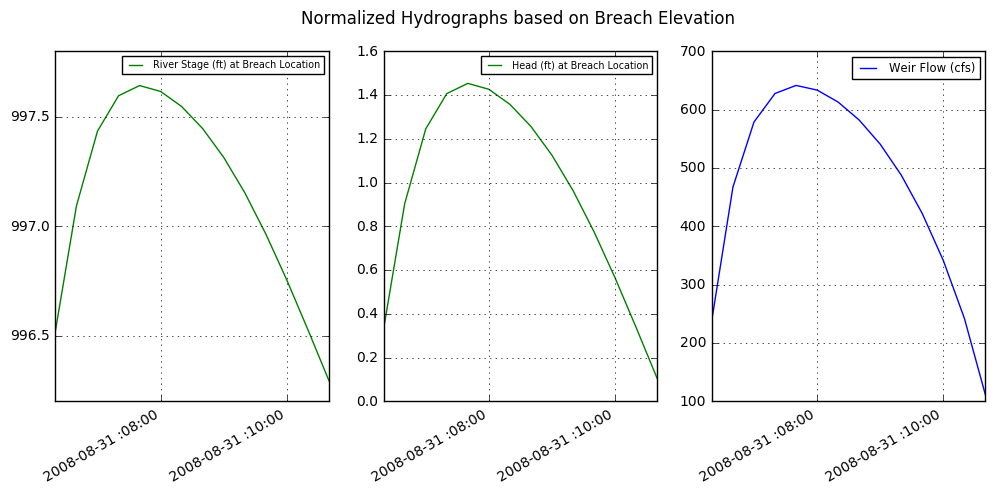

In [4]:
input_hydro = df['Big_Hollow']
station = str(1)
breach_point = 1
breach_height = 996.19

GetBreachFlow(input_hydro, 'Deposit', rasdata, station, breach_point, breach_height, data_dir, date_int = 2)

### Breach Location # 1: Butler Brook (upstream)


**RAS Data for XS 2300**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Repos\HydrologyTools\sample_data\Deposit_BreachData_2300_location_1.tsv


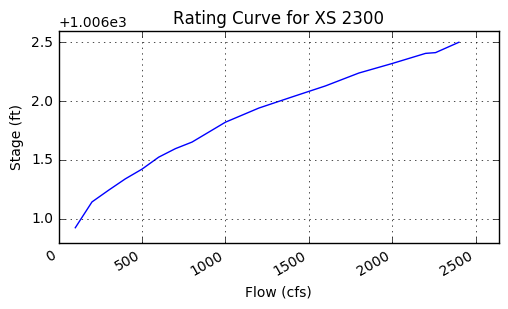

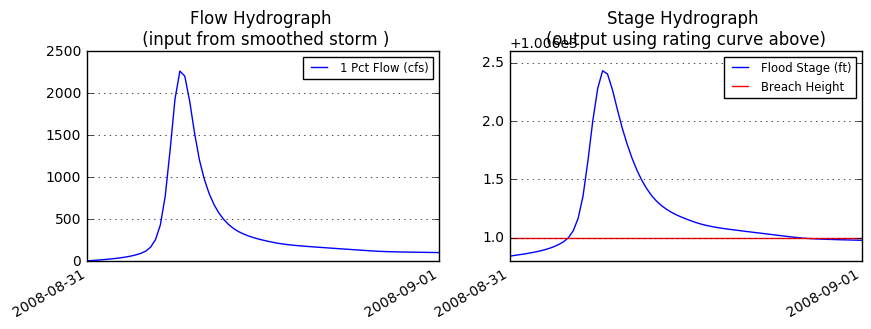

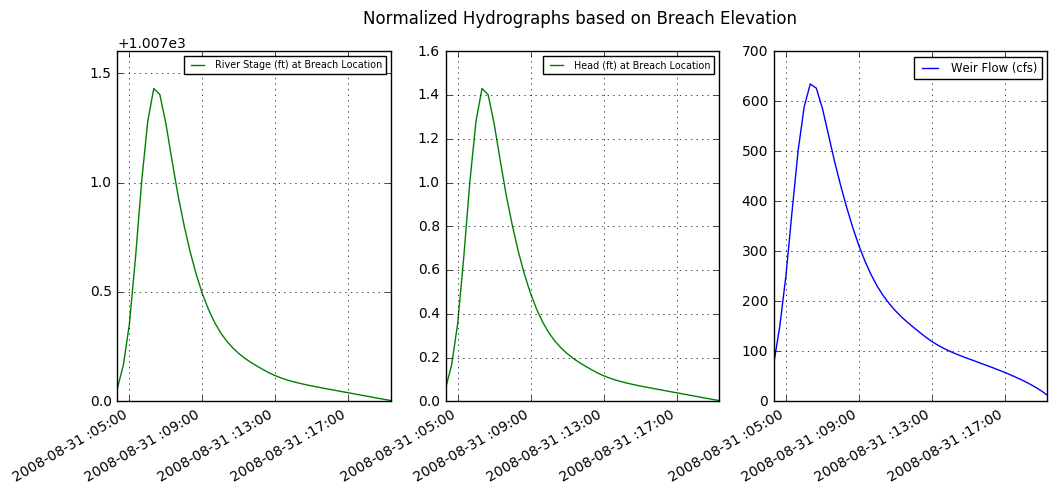

In [11]:
input_hydro = df['Butler_Brook']
station = str(2300)
breach_point = 1
breach_height = 1007

GetBreachFlow(input_hydro, 'Deposit', rasdata, station, breach_point, breach_height, data_dir, date_int =4)

### Breach Location # 2:

**RAS Data for XS 1**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Repos\HydrologyTools\sample_data\deposit_BreachData_1_location_2.tsv


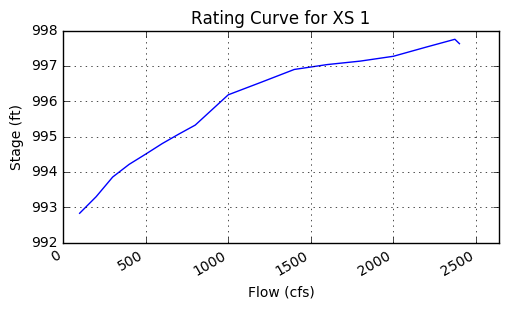

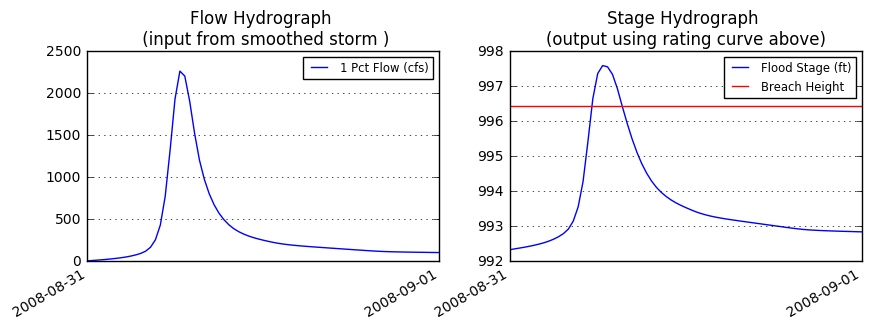

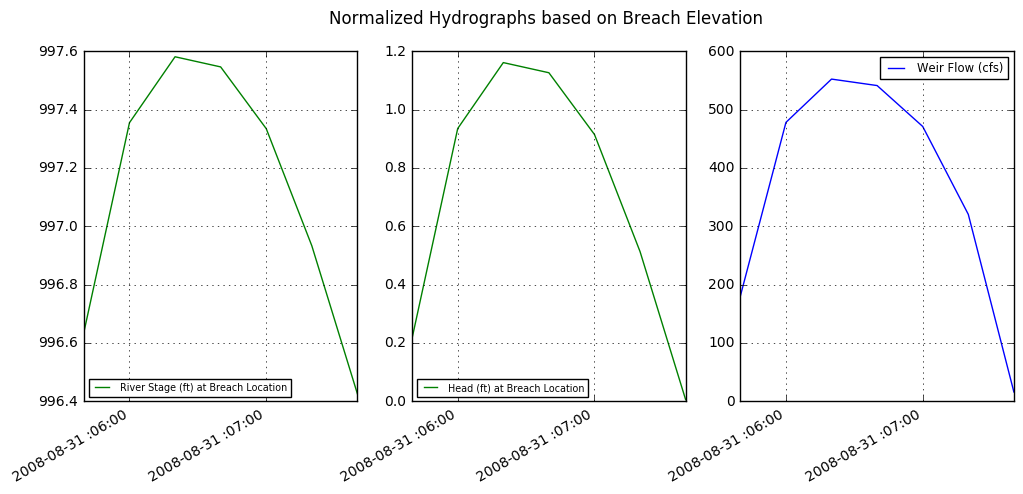

In [12]:
input_hydro = df['Butler_Brook']
station = str(1)
breach_point = 2
breach_height = 996.42

GetBreachFlow(input_hydro, 'deposit', rasdata, station, breach_point, breach_height, data_dir, date_int = 1)